In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
cr_loan_clean = pd.read_csv('cr_loan_w2.csv')

## Logistic regression basics

In [8]:
# Create the X and y datasets
X = cr_loan_clean[['loan_int_rate']]
y = cr_loan_clean[['loan_status']]

In [9]:
# Create and fit a logistic regression model
clf_logistic_single = LogisticRegression(solver='lbfgs')
clf_logistic_single.fit(X, np.ravel(y))

# Print the parameters of the model
print(clf_logistic_single.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [10]:
# Print the intercept of the model
print(clf_logistic_single.intercept_)

[-4.45785901]


You're on your way to making predictions! Notice that the model was able to fit to the data, and establish some parameters internally. It's even produced an .intercept_ value like in the lecture. 

## Multivariate logistic regression

In [11]:
# Create X data for the model
X_multi = cr_loan_clean[['loan_int_rate','person_emp_length']]

# Create a set of y data for training
y = cr_loan_clean[['loan_status']]

In [12]:
# Create and train a new logistic regression
clf_logistic_multi = LogisticRegression(solver='lbfgs').fit(X_multi, np.ravel(y))

# Print the intercept of the model
print(clf_logistic_multi.intercept_)

[-4.21645549]


Take a closer look at each model's .intercept_ value. The values have changed! The new clf_logistic_multi model has an .intercept_ value closer to zero. This means the log odds of a non-default is approaching zero.

## Creating training and test sets

In [13]:
# Create the X and y data sets
X = cr_loan_clean[['loan_int_rate','person_emp_length','person_income']]
y = cr_loan_clean[['loan_status']]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

# Create and fit the logistic regression model
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Print the models coefficients
print(clf_logistic.coef_)

[[ 1.28517496e-09 -2.27622202e-09 -2.17211991e-05]]


Do you see that three columns were used for training and there are three values in .coef_? This tells you how important each column, or feature, was for predicting. The more positive the value, the more it predicts defaults. Look at the value for loan_int_rate.

# Predicting the probability of default

In [14]:
X1_train = cr_loan_clean[['person_income', 'person_emp_length', 'loan_amnt']]
X2_train = cr_loan_clean[['person_income', 'loan_percent_income', 'cb_person_cred_hist_length']]
y_train = cr_loan_clean[['loan_status']]

In [15]:
# Print the first five rows of each training set
print(X1_train.head())
print(X2_train.head())

# Create and train a model on the first training data
clf_logistic1 = LogisticRegression(solver='lbfgs').fit(X1_train, np.ravel(y_train))

# Create and train a model on the second training data
clf_logistic2 = LogisticRegression(solver='lbfgs').fit(X2_train, np.ravel(y_train))

   person_income  person_emp_length  loan_amnt
0           9600                  5       1000
1           9600                  1       5500
2          65500                  4      35000
3          54400                  8      35000
4           9900                  2       2500
   person_income  loan_percent_income  cb_person_cred_hist_length
0           9600                 0.10                           2
1           9600                 0.57                           3
2          65500                 0.53                           2
3          54400                 0.55                           4
4           9900                 0.25                           2


In [16]:
# Print the coefficients of each model
print(clf_logistic1.coef_)
print(clf_logistic2.coef_)

[[-4.05616932e-05 -2.55445843e-08  1.06992910e-04]]
[[-2.19505674e-05  8.92164606e-11 -1.65771266e-09]]


Notice that the coefficient for the person_income changed when we changed the data from X1 to X2. This is a reason to keep most of the data like we did in chapter 1, because the models will learn differently depending on what data they're given!

## Predicting probability of default

In [17]:
# Create the X and y data sets
X = cr_loan_clean[['loan_int_rate','person_emp_length','person_income']]
y = cr_loan_clean[['loan_status']]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=123)

# Create and fit the logistic regression model
clf_logistic = LogisticRegression(solver='lbfgs').fit(X, np.ravel(y))

In [18]:
# Create predictions of probability for loan status using test data
preds = clf_logistic.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

   loan_status  prob_default
0            1      0.387837
1            1      0.452121
2            0      0.071326
3            0      0.132468
4            1      0.147668


# Credit Model Performance

In [19]:
from sklearn.metrics import classification_report

## Default classification reports

In [20]:
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

In [21]:
# Reassign loan status based on the threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

In [22]:
# Print the row counts for each loan status
print(preds_df['loan_status'].value_counts())

0    8046
1     792
Name: loan_status, dtype: int64


In [23]:
# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.83      0.96      0.89      6930
     Default       0.65      0.27      0.38      1908

    accuracy                           0.81      8838
   macro avg       0.74      0.61      0.63      8838
weighted avg       0.79      0.81      0.78      8838



Well isn't this a surprise! It looks like almost all of our test set was predicted to be non-default. The recall for defaults is 0.27 which is meaning that 27% of our true defaults were predicted correctly.

## Selecting report metrics

In [24]:
from sklearn.metrics import precision_recall_fscore_support

In [25]:
# Print all the non-average values from the report
print(precision_recall_fscore_support(y_test,preds_df['loan_status']))

(array([0.82674621, 0.6489899 ]), array([0.95988456, 0.26939203]), array([0.8883547 , 0.38074074]), array([6930, 1908]))


In [26]:
# Print the first two numbers from the report
print(precision_recall_fscore_support(y_test,preds_df['loan_status'])[0])

[0.82674621 0.6489899 ]


## Visually scoring credit models

### ROC curve charts

In [27]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

0.81081692690654


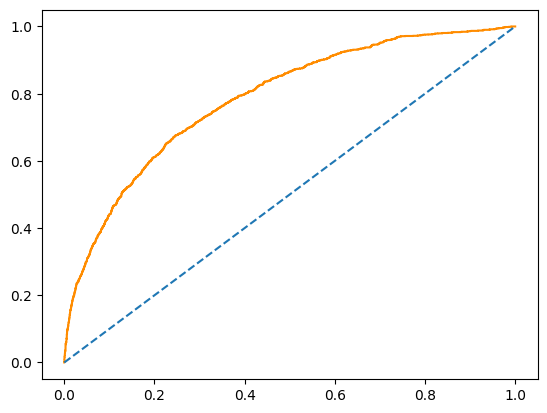

In [28]:
# Create predictions and store them in a variable
preds = clf_logistic.predict_proba(X_test)

# Print the accuracy score the model
print(clf_logistic.score(X_test, y_test))

# Plot the ROC curve of the probabilities of default
prob_default = preds[:, 1]
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

In [29]:
# Compute the AUC and store it in a variable
auc = roc_auc_score(y_test, prob_default)
print(auc)

0.7850115788008869


The accuracy for this model is about 81% and the AUC score is 78%. Notice that what the ROC chart shows us is the tradeoff between all values of our false positive rate (fallout) and true positive rate (sensitivity).

## Model Discrimination and impact

### Confusion Matrices

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
# Set the threshold for defaults to 0.5
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

# Print the confusion matrix
print(confusion_matrix(y_test,preds_df['loan_status']))

[[6652  278]
 [1394  514]]


In [32]:
# Set the threshold for defaults to 0.4
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Print the confusion matrix
print(confusion_matrix(y_test,preds_df['loan_status']))

[[6268  662]
 [1093  815]]


### How thresholds affect performance

In [33]:
# Reassign the values of loan status based on the new threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Store the number of loan defaults from the prediction data
num_defaults = preds_df['loan_status'].value_counts()[1]

# Store the default recall from the classification report
default_recall = precision_recall_fscore_support(y_test, preds_df['loan_status'])[1][1]

# Calculate the estimated impact of the new default recall rate
avg_loan_amnt = 9583
print(num_defaults * avg_loan_amnt * (1 - default_recall))

8108187.349580714


By our estimates, this loss would be around $8.1 million. That seems like a lot! Try rerunning this code with threshold values of 0.3 and 0.5. Do you see the estimated losses changing? How do we find a good threshold value based on these metrics alone?

In [34]:
# Reassign the values of loan status based on the new threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

# Store the number of loan defaults from the prediction data
num_defaults = preds_df['loan_status'].value_counts()[1]

# Store the default recall from the classification report
default_recall = precision_recall_fscore_support(y_test, preds_df['loan_status'])[1][1]

# Calculate the estimated impact of the new default recall rate
avg_loan_amnt = 9583
print(num_defaults * avg_loan_amnt * (1 - default_recall))

5545121.584905661


### Threshold selection

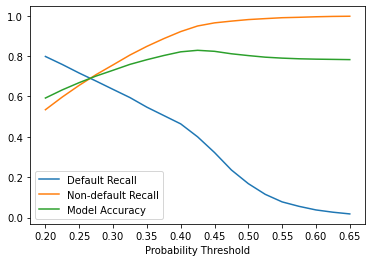

In [114]:
thresh = [0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65]
def_recalls = [0.7981438515081206, 0.7583139984532096, 0.7157772621809745, 0.6759474091260634, 0.6349574632637278, 0.594354215003867, 0.5467904098994586, 0.5054137664346481, 0.46403712296983757, 0.39984532095901004, 0.32211910286156226, 0.2354988399071926, 0.16782675947409126, 0.1148491879350348, 0.07733952049497293, 0.05529775715390565, 0.03750966744006187, 0.026295436968290797, 0.017788089713843776]
nondef_recalls = [0.5342465753424658, 0.5973037616873234, 0.6552511415525114, 0.708306153511633, 0.756468797564688, 0.8052837573385518, 0.8482278756251359, 0.8864970645792564, 0.9215046749293324, 0.9492280930637095, 0.9646662317895195, 0.9733637747336378, 0.9809741248097412, 0.9857577734290063, 0.9902152641878669, 0.992280930637095, 0.9948901935203305, 0.9966297021091541, 0.997499456403566]
accs = [0.5921588594704684, 0.6326374745417516, 0.6685336048879837, 0.7012050237610319, 0.7298031228784793, 0.7589952477936185, 0.7820773930753564, 0.8028682959945689, 0.8211133740665308, 0.8286659877800407, 0.8236591989137814, 0.811439239646979, 0.8025288526816021, 0.7946367956551256, 0.7898845892735913, 0.7866598778004074, 0.7847929395790902, 0.7836897488119484, 0.7825016972165648]
ticks = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65]
plt.plot(thresh,def_recalls)
plt.plot(thresh,nondef_recalls)
plt.plot(thresh,accs)
plt.xlabel("Probability Threshold")
plt.xticks(ticks)
plt.legend(["Default Recall","Non-default Recall","Model Accuracy"])
plt.show()

This is the easiest pattern to see on this graph, because it's the point where all three lines converge. This threshold would make a great starting point, but declaring all loans about 0.275 to be a default is probably not practical.